In [96]:
import corv
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astroquery.sdss import SDSS

In [213]:
C2_line = [5889]
C2_line = corv.utils.air2vac(C2_line)

In [292]:
wl

array([ 3566.1538,  3566.9744,  3567.7969, ..., 10337.131 , 10339.515 ,
       10341.888 ], dtype=float32)

(0.0, 50.0)

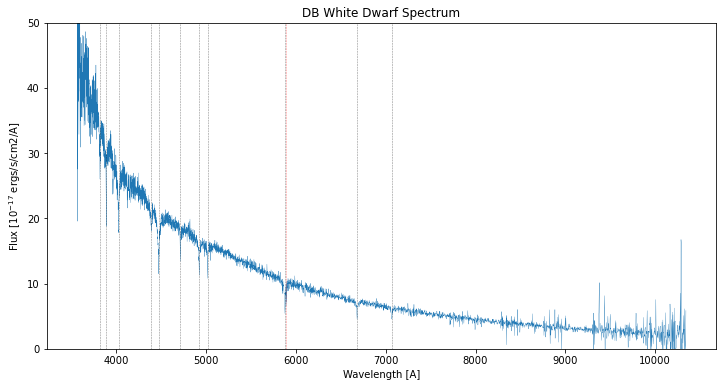

In [291]:
He_lines = [3819.607,3888.6489,4026.191,4387.929,4471.479,4713.146,4921.931,5015.678,5875.6148,6678.1517,7065.1771]
He_lines = corv.utils.air2vac(He_lines)

DB = SDSS.get_spectra_async(plate=5057, fiberID=276, mjd=56209)[0].get_fits()

wl = 10**DB[1].data['LOGLAM']
fl = DB[1].data['FLUX']
ivar = DB[1].data['IVAR']

plt.figure(figsize=(12,6))

plt.plot(wl, fl,lw=0.3)
min_, max_ = 0,50
plt.vlines(He_lines, min_, max_, colors = 'black', linestyle = 'dashed', alpha = 0.5,lw=0.5)
plt.vlines(C2_line, min_, max_, colors = 'red', linestyle = 'dashed', alpha = 0.5,lw=0.5)
plt.ylabel(r'Flux [$10^{-17}$ ergs/s/cm2/A]')
plt.xlabel(r'Wavelength [A]')
plt.title('DB White Dwarf Spectrum')
#plt.xlim(3600,4100)
plt.ylim(min_,max_)

Now we choose the lines we want to use to determine RV. We first list all the lines, and desired window size and the edge sizes. To choose window size we can plot the spectra and make sure there's no other feature within the window (w.r.t to the centre). To choose the edge size we can make sure the sborption is reasonably within this value and that the continuim can be obtained from rest of it.

We drop all lines below 4000 \AA because of nearby lines. We also drop line at 5879 because of nearby CII line.

We choose to make our own lines using voigt profile with nvoigt=2. Ideally, we should use the DB spectral template but we get a very good result even without them. 

In [248]:
centre = {'a':He_lines[0],'b':He_lines[1],'c':He_lines[2],'d':He_lines[3],'e':He_lines[4],'f':He_lines[5],\
          'g':He_lines[6],'h':He_lines[7],'i':He_lines[8],'j':He_lines[9],'k':He_lines[10]}
window = {'a':40,'b':40,'c':50,'d':50,'e':50,'f':50,'g':70,'h':70,'i':70,'j':100,'k':100}
edge = {'a':25,'b':25,'c':35,'d':35,'e':35,'f':35,'g':35,'h':35,'i':35,'j':35,'k':35}
name = ['a','b','c','d','e','f','g','h','i','j','k']

<Parameter 'RV', value=35.72796458928542 +/- 3.5, bounds=[-2500:2500]>


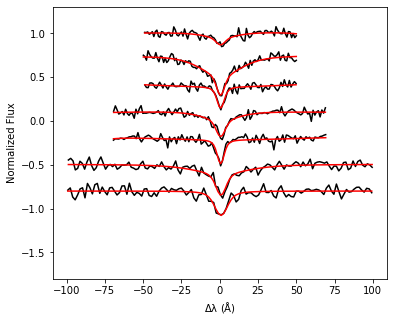

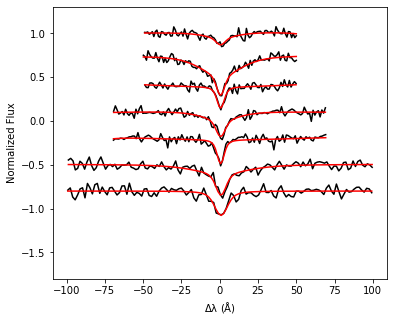

In [287]:
kmodel = corv.models.make_balmer_model(nvoigt=2,centres=centre,windows=window,edges=edge,\
                                       names=['d','e','f','g','h','j','k'])

coadd_param_res, coadd_rv_res, coadd_rv_init = corv.fit.fit_corv(wl, fl, ivar,kmodel, iter_teff = False)
   
res_k, rv_init_k = corv.fit.fit_rv(wl, fl, ivar, kmodel, coadd_param_res.params)

print(res_k.params['RV'])

corv.utils.lineplot(wl, fl, ivar, kmodel, res_k.params, printparams = False, gap = 0.3, figsize = (6, 5))
